In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(8.0, 6.0)  

gradient

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

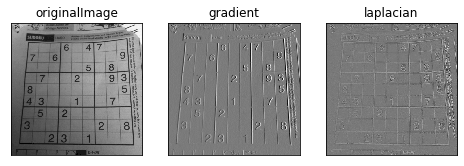

In [10]:
im = cv2.imread('sudo.png',0)
sobelx = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=5)
laplacian = cv2.Laplacian(im,cv2.CV_64F)
plt.subplot(131)
plt.imshow(im, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('originalImage')
plt.subplot(132)
plt.imshow(sobelx, cmap='gray')
plt.title('gradient')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(laplacian, cmap='gray')
plt.title('laplacian')
plt.xticks([]), plt.yticks([])

# histogram calculation using numpy

Text(0.5, 1.0, 'hist')

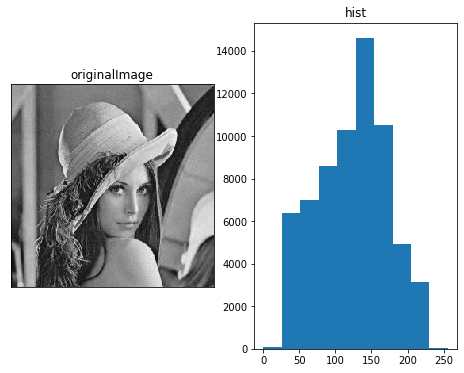

In [11]:
im = cv2.imread('lena.png',0)
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('originalImage')
plt.subplot(122)
plt.hist(im.ravel(),10,[0,256])
plt.title('hist')

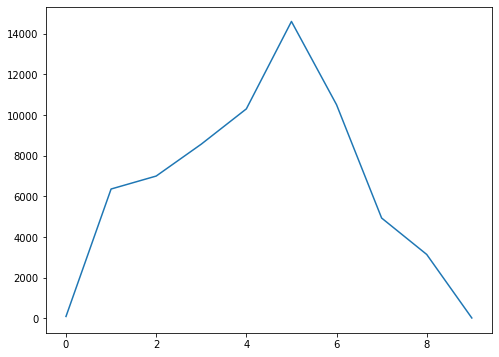

In [19]:
# (img, bins, range, weight, density)
hist,bins = np.histogram(im.ravel(),10,[0,256])
hist
plt.plot(hist)

# histogram using opencv

In [12]:
cv2.calcHist??

Docstring:
calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
.   @overload
Type:      builtin_function_or_method


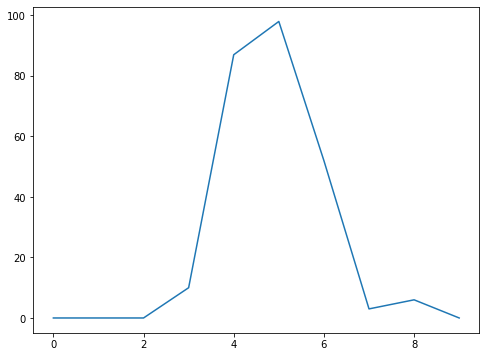

In [13]:
hist = cv2.calcHist(im, [0], None, [10], [0, 256])
plt.plot(hist)

# Draw the histogram using matplotlib

Text(0.5, 1.0, 'hist')

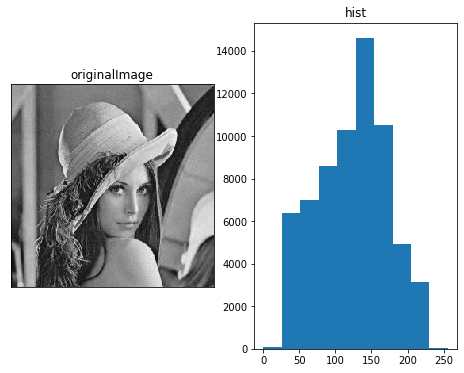

In [14]:
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('originalImage')
plt.subplot(122)
plt.hist(im.ravel(),10,[0,256])
plt.title('hist')

# histogram with mask

(0, 256)

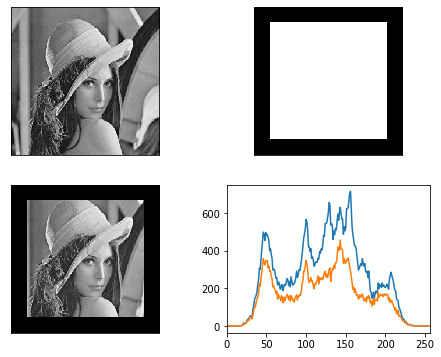

In [10]:
img = cv2.imread('lena.png',0)

h,w = img.shape
# get the image center coodinates
ch, cw = np.int(h/2), np.int(w/2)
# mask region size
cs=100
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)

mask[ch-cs:ch+cs, cw-cs:cw+cs] = 255

masked_img = cv2.bitwise_and(img,img,mask=mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(mask,'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(masked_img, 'gray'),plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

In [ ]:
cv2.bitwise_and??

# histogram equalization

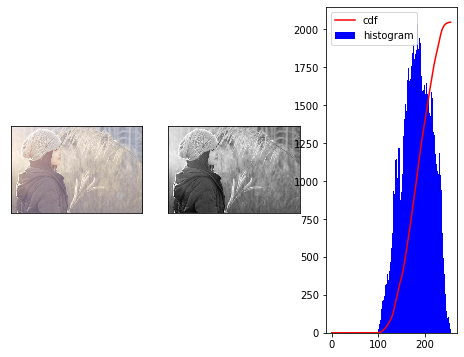

In [73]:
imc =cv2.imread('baoguang.jpg')
img = cv2.cvtColor(imc, cv2.COLOR_BGR2GRAY)
# input should be 1d using img.flatten()[img, bins, range]
hist, bins = np.histogram(img.flatten(), 256, [0,256])

# Cumulative Distribution Function (cdf)
cdf = hist.cumsum()

#  *hist.max() mainly for display 
cdf_n =cdf*hist.max()/cdf.max()

plt.subplot(131)
plt.imshow(imc[...,::-1])
plt.xticks([]),plt.yticks([])

plt.subplot(132)
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])

plt.subplot(133)
plt.plot(cdf_n, color='r')
plt.hist(img.flatten(), 256, [0,256], color='b')
plt.legend(('cdf','histogram'), loc='upper left')
plt.show()

(array([ 542.,  610.,  652.,  545.,  625.,  655.,  722.,  743.,  410.,
         921.,  515.,  532.,  560.,  609.,  656.,  818.,  937.,    0.,
        1083.,  917.,    0., 1095.,    0., 1139.,    0., 1090., 1147.,
           0., 1019., 1018.,    0., 1090.,    0., 1073.,    0., 1221.,
           0., 1239., 1215.,    0., 1066.,  876.,    0.,  826.,  930.,
           0.,  989., 1048.,    0., 1204.,    0., 1296.,    0., 1316.,
           0., 1409.,    0.,    0., 1525.,    0., 1490.,    0., 1508.,
           0., 1541.,    0.,    0., 1460.,    0., 1599.,    0.,    0.,
        1664.,    0., 1794.,    0.,    0., 1748.,    0.,    0., 1615.,
           0., 1662.,    0.,    0., 1598.,    0., 1673.,    0.,    0.,
        1684.,    0., 1756.,    0.,    0., 1779.,    0.,    0., 1850.,
           0.,    0., 1846.,    0., 1687.,    0.,    0., 1905.,    0.,
           0., 1770.,    0.,    0., 1803.,    0., 1724.,    0.,    0.,
        1836.,    0.,    0., 1808.,    0.,    0., 1863.,    0.,    0.,
      

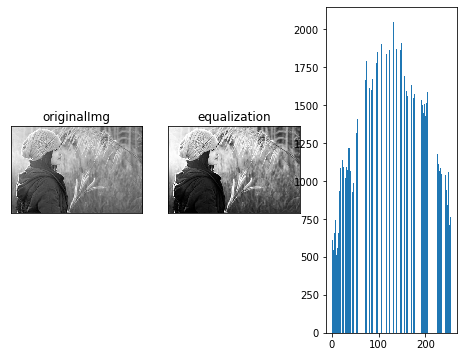

In [86]:
# not use the values of 0
cdf_m = np.ma.masked_equal(cdf, 0)

# cumulative distribution function normalization 0-255
cdf_m= (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# obtain the mapping
cdfN = np.ma.filled(cdf_m, 0).astype('uint8')

# mapping the image from brighter to whole ranges
img2 = cdfN[img]
# img2

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('originalImg')

plt.subplot(132)
plt.imshow(img2, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('equalization')

plt.subplot(133)
plt.hist(img2.flatten(), 256, [0,255])
# plt.xticks([]), plt.yticks([])

In [ ]:
cv2.equalizeHist??

# histogram equlization using opencv

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

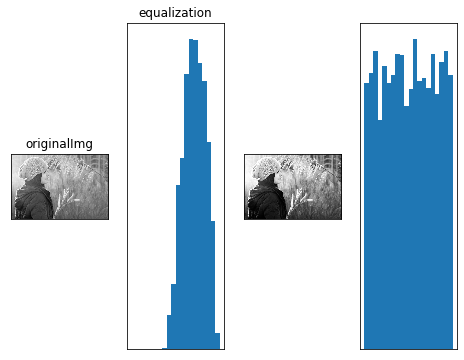

In [95]:
imc =cv2.imread('baoguang.jpg')
img = cv2.cvtColor(imc, cv2.COLOR_BGR2GRAY)

ime = cv2.equalizeHist(img)

plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('originalImg')

plt.subplot(142)
plt.hist(img.flatten(), 20, [0,256])
plt.xticks([]), plt.yticks([])
plt.title('equalization')

plt.subplot(143)
plt.imshow(ime, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.hist(ime.flatten(), 20, [0,256])
plt.xticks([]), plt.yticks([])

# adaptive histogram equalization

(<matplotlib.image.AxesImage at 0x230c0b8a5c8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

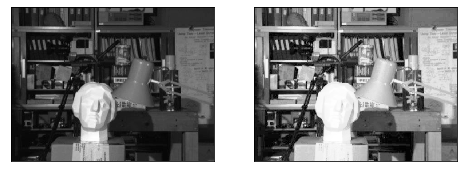

In [2]:
im = cv2.imread('statue.png',0)

ime= cv2.equalizeHist(im)

plt.subplot(121)
plt.imshow(im,cmap='gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(ime,cmap ='gray'),plt.xticks([]), plt.yticks([])


(<matplotlib.image.AxesImage at 0x230c0d91108>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

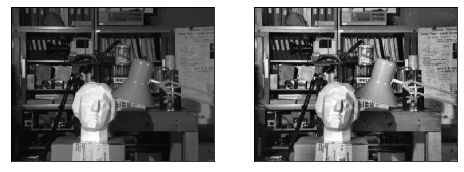

In [7]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(im)
plt.subplot(121)
plt.imshow(im,cmap='gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(cl1,cmap ='gray'),plt.xticks([]), plt.yticks([])

In [3]:
cv2.createCLAHE??

Docstring:
createCLAHE([, clipLimit[, tileGridSize]]) -> retval
.   @brief Creates a smart pointer to a cv::CLAHE class and initializes it.
.   
.   @param clipLimit Threshold for contrast limiting.
.   @param tileGridSize Size of grid for histogram equalization. Input image will be divided into
.   equally sized rectangular tiles. tileGridSize defines the number of tiles in row and column.
Type:      builtin_function_or_method
